* scikit-learn 패키지의 iris 예제 데이터 셋을 로드.
* iris 데이터 탐색
* 데이터 셋을 훈련 셋과 테스트 셋으로 분리
* KNN 분류기 생성
* 모델 훈련
* 훈련 셋 평가(정확도), 테스트 셋 평가(정확도)
    * confusion matrix, 분류 리포트 출력
* KNN 모델의 k값을 변화시키면서, 모델 훈련/평가를 반복.
    * 테스트 셋에서 가장 좋은 결과를 주는 k값을 찾음.

In [866]:
import numpy as np  # ndarray(배열) 함수, 메서드
import pandas as pd  # Series, DataFrame 함수, 메서드
import matplotlib.pyplot as plt  # 시각화
import seaborn as sns  # 시각화


# 머신 러닝 모델(알고리즘) - KNN 분류기
from sklearn.neighbors import KNeighborsClassifier
# 훈련/테스트 셋 분리 함수
from sklearn.model_selection import train_test_split
# 모델 평가 지표 함수
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 특성 스케일링 클래스
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.datasets import load_iris

iris = load_iris()

In [867]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [868]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [870]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [872]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [874]:
array1=[]
for i, x in  enumerate(iris["target"]):
    
    
    if x==0:
        x="setosa"
    elif x==1:
        x="versicolor"
    elif x==2 :
        x="virginica"
    
    array1.append(x)


In [875]:
array1

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',


In [877]:
col_names=iris['feature_names']
col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [878]:
df=pd.DataFrame(iris["data"], columns=col_names)

In [879]:
df["Species"]=array1

In [880]:
features=df.iloc[:, :-1].values
target=df["Species"].values


In [881]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [882]:
print(features.shape)
print(target.shape)

(150, 4)
(150,)


In [883]:
features.shape

(150, 4)

In [884]:
target

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [885]:
150 * 0.7 , 150 * 0.3

(105.0, 45.0)

In [886]:
num_test=105

In [887]:
X_train = features[:num_test, :]    # 훈련 셋
y_train = target[:num_test]         # 훈련 레이블
X_test = features[num_test, :]      # 테스트 셋
y_test = target[num_test:]          # 테스트 레이블

In [888]:
np.unique(target, return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([50, 50, 50], dtype=int64))

In [889]:
np.unique(y_train)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [890]:
np.unique(y_test)

array(['virginica'], dtype=object)

In [891]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=105, shuffle=False)

In [892]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [893]:
y_train.shape, y_test.shape

((105,), (45,))

### knn 분류기 생성

In [894]:
knn= KNeighborsClassifier() # 머신러닝 모델 생성

In [895]:
knn.fit(X_train, y_train)   # 머신러닝 모델 훈련

KNeighborsClassifier()

In [896]:
# 훈련 셋에서의 예측 결과 평가
train_pred= knn.predict(X_train)
train_pred

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [897]:
# 훈련 셋의 실젯값(훈련 레이블)
y_train

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [898]:
# 훈련 셋 정확도
train_acc=np.mean(train_pred== y_train)
train_acc

0.9904761904761905

In [899]:
# 테스트 셋에서의 예측 결과 평가
test_pred = knn.predict(X_test)
test_pred

array(['virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [900]:
test_acc=np.mean(test_pred==y_test)
test_acc

0.6222222222222222

# 임의 추출 (random sampling)

In [901]:
idx= np.arange(150)
print(idx)
np.random.shuffle(idx)
print(idx)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
[ 38  64  44 133  36  58 116  10  82  60 149 102   0  86  72  99  71 132
 108  51  35  56  15 138  67 137  98  80 130  83 107  50  14 141 122  59
  33  17 117  78 110 144  77 103  87 125  90 136  81  66   7  42   4 114
  94 120 111  30 104 105  97  73  55 123  46 140  91   1 147  37  70   5
  16  84  52  41  53  88  48  23 106 100 115  27  62  96 124  45 119 121
  95  32 126  49  18  26 

In [902]:
# 훈련 셋/ 테스트 셋을 임의 추출 방식으로 분리
X_train, X_test, y_train, y_test= train_test_split(features, target, train_size=100, shuffle=True,
                                                   random_state=30)

In [903]:
X_train.shape

(100, 4)

In [904]:
np.unique(y_train, return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([37, 32, 31], dtype=int64))

### knn 모델 훈련, 예측, 평가

In [905]:
knn=KNeighborsClassifier()

In [906]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [907]:
train_pred = knn.predict(X_train)  # 훈련 셋 예측값
print(train_pred)

['setosa' 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica'
 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa'
 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa'
 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'setosa' 'virginica'
 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'virginica' 'virginica

In [908]:
train_acc = knn.score(X_train, y_train)  # 훈련 셋 정확도
train_acc

0.98

In [909]:
test_pred = knn.predict(X_test)  # 테스트 셋의 예측값
print(test_pred)

['setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'setosa'
 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'virginica' 'virginica' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor']


In [910]:
test_acc = knn.score(X_test, y_test)  # 테스트 셋 정확도
test_acc

0.92

# 층화 추출(Startified Sampling)

In [911]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.3,
                                                    stratify=target,
                                                    random_state=30)

In [912]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

### 모델 훈련, 예측, 평가

In [913]:
knn= KNeighborsClassifier()

In [914]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [915]:
train_pred = knn.predict(X_train)  # 훈련 셋 예측값
print(train_pred)
print(y_train)  # 훈련 레이블

['setosa' 'versicolor' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'virginica' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa'
 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'virginica' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'setosa'
 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa' 'virginica'
 'virginica' 'virginica' 'setosa' 'virginica' 'versicolor' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'v

In [916]:
train_acc = knn.score(X_train, y_train)  # 훈련 셋에서의 정확도
train_acc

0.9809523809523809

In [917]:
test_pred = knn.predict(X_test)  # 테스트 셋 예측값
print(test_pred)
print(y_test)  # 테스트 셋 실젯값(테스트 레이블)

['virginica' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'setosa' 'virginica' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'virginica' 'virginica' 'versicolor']
['virginica' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'virginica' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'virginica' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'v

In [918]:
test_acc = knn.score(X_test, y_test)
test_acc

0.9333333333333333

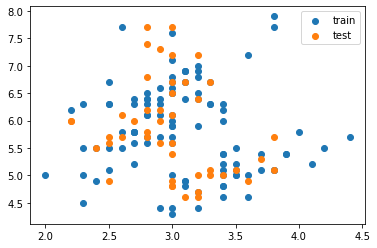

In [919]:
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='test')

plt.legend()
plt.show()

# 분류 모델 평가 지표

### confusion matrix, 분류 리포트 출력

In [920]:
# 테스트 셋의 오차 행렬(confusion matrix ,혼동 행렬, 혼돈 행렬)
confusion_matrix(y_true=y_test, y_pred=test_pred)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

In [921]:
report= classification_report(y_true=y_test, y_pred=test_pred)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.87      0.90        15
   virginica       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# Knn 모델의 k값을 변화시키면서 모델 훈련/ 평가를 반복.
    * 테스트 셋에서 가장 좋은 결과를 주는 k값을 찾음